# Improving Computer Vision Accuracy using Convolutions
이전까지는 단순하게 Dense layer를 통해 DNN으로 fashion recognition을 해 보았음. 이번에는 Convolutional layer를 이용하여 CNN으로 recognition.
- Convolution layer

    By passing filters over an image to **reduce the amount of information**, they then allowed the neural network to **effectively extract features** that can distinguish one class of image from another.

- Pooling layer

    You also saw how pooling **compresses the information** to make it more manageable.

In [1]:
import tensorflow as tf

In [2]:
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

### Convolution layer 입력을 위해 input shape 맞추기
tf.keras.layers.Conv2D(num of filters, size of filters, activation, input shape)
* **input shape = (Height, Width, Channel)**
* X_train.shape = (Num of images, Height, Width)

How to reshape
1. `.reshape` : X_train.reshape(SAME, SAME, SAME, 1)
2. `np.expand_dims` : X_train = np.expand_dims(X_train, axis=3)
3. 

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_test.shape

(10000, 28, 28)

In [8]:
X_test = X_test.reshape(10000, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

### Normalize

In [9]:
X_train = X_train / 255.
X_test = X_test / 255.

### Training
`tf.keras.Sequential()`과 `tf.keras.models.Sequential()`의 차이는 뭐지?!
* 버전이 바뀌면서 발생한 문제고, 기본적으로 같다고 함니댜
* tfv2에서는 `tf.keras.Sequential()`의 사용이 장려되는듯
* 참고로 functional API는 tf.keras.**Model**(inputs=, outputs=)임

In [15]:
tf.keras.models.Sequential == tf.keras.Sequential

True

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

모델을 보자. DNN에서 위에 Convolutional layer(Conv2D&MaxPooling2D)를 추가한게 CNN이다.
* DNN 다시봐라
    ```
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    ```
* 이 코드 고대로 윗부분에만 Conv2D&MaxPooling2D가 깔린 것임!!!!!!!!

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4430 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2977 - accuracy: 0.8900
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2544 - accuracy: 0.9057
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2215 - accuracy: 0.9178
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1948 - accuracy: 0.9269


### Evaluation

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2747 - accuracy: 0.9047


[0.2747284770011902, 0.904699981212616]

In [16]:
# 이렇게 해도 되징
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2747 - accuracy: 0.9047


In [17]:
print("loss: ", test_loss)
print("accuracy: ", test_acc)

loss:  0.2747284770011902
accuracy:  0.904699981212616


### Visualizing
시각화할거얌

In [18]:
print(y_test[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


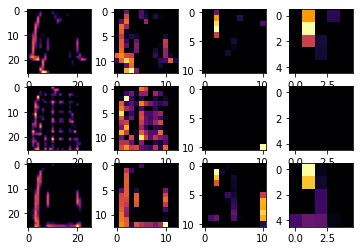

In [21]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=4
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 3

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

## EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!